Công ty của bạn hiện nay đang muốn đẩy mạnh hoạt động kinh doanh bằng cách tập chung các chiến lược khác nhau cho các nhóm khách hàng khác nhau. Như vậy việc quan trọng là cần phân khách hàng thành các nhóm cụ thể dựa trên một số yếu tố nào đó. Nhiệm vụ của bạn là tìm các yếu tố đó và phân khách hàng vào các nhóm cụ thể

Bạn sẽ được cung cấp một bộ dữ liệu để thực hiện xây dựng mô hình phân nhóm khách hàng:

Thông tin các cột trong file dữ liệu:
* **InvoiceNo**: Id Hoá đơn
* **StockCode**: Id của các mặt hàng đã mua
* **Description**: Môt tả của mặt hàng
* **Quantity**: Số lượng của mặt hàng đã mua.
* **InvoiceDate**: Ngày mua
* **UnitPrice**: Giá của mặt hàng
* **CustomerID**: Id khách hàng đã mua hàng
* **Country**: Tên quốc gia của khách hàng

## Customer Segmentation:

Customer segmentation là quá trình phân chia khách hàng của công ty, doanh nghiệp thành các nhóm hoặc phân khúc khác nhau dựa trên các thuộc tính khác nhau của khách hàng. Quá trình phân khúc khách hàng dựa trên tìm kiếm sự khác biệt giữa hành vi hoặc đặc điểm của khách hàng.

Các mục tiêu và lợi ích chính của việc phân khúc khách hàng:

* **Tăng doanh thu:** Đây là mục tiêu rõ ràng nhất của bất kỳ nhiệm vụ phân khúc khách hàng nào
* **Hiểu khách hàng:** Một trong những mô hình kinh doanh được ngày càng phổ biến là “know your customer - KYC”, việc phân khúc được khách hàng sẽ giúp ích rất nhiều cho mô hình này.
* **Marketing:** Lợi ích dễ thấy nhất của việc phân khúc khách hàng là khả năng tập trung các tiếp thị một cách hiệu quả. Nếu một công ty biết các phân khúc khác nhau trong cơ sở khách hàng của mình, thì công ty có thể đưa ra các chiến dịch tiếp thị tốt hơn được thiết kế riêng cho phân khúc đó. Một mô hình phân khúc tốt cho phép hiểu rõ hơn về các yêu cầu của khách hàng và do đó làm tăng cơ hội thành công của bất kỳ chiến dịch tiếp thị nào do tổ chức phát triển.

* **Đặt vị trí thích hợp cho Sản phẩm** Một chiến lược phân khúc khách hàng tốt cũng có thể giúp công ty phát triển hoặc cung cấp các sản phẩm mới, hoặc một nhóm sản phẩm với nhau như một hình thức cung cấp kết hợp.
* **Tìm các phân khúc khách hàng tiềm ẩn:** Tìm ra phân khúc khách hàng có thể còn thiếu để xác định phân khúc khách hàng chưa được khai thác bằng cách tập trung vào các chiến dịch tiếp thị hoặc phát triển kinh doanh mới.

## Một số thuật ngữ, phương pháp sẽ được sử dùng 

#### 1. Clustering:
Phương pháp rõ ràng nhất để thực hiện phân khúc khách hàng là sử dụng các phương pháp Học máy không giám sát như phân cụm. Phương pháp này đơn giản nhất là thu thập càng nhiều dữ liệu về khách hàng càng tốt dưới dạng các tính năng hoặc thuộc tính và sau đó tìm ra các cụm khác nhau có thể thu được từ dữ liệu đó. Cuối cùng, chúng ta có thể tìm ra đặc điểm của các phân khúc khách hàng bằng cách phân tích các đặc điểm của các cụm.

#### 2.Exploratory Data Analysis - EDA

EDA là một cách khác để tìm ra phân khúc khách hàng. Điều này thường được thực hiện bởi các nhà phân tích có kiến ​​thức tốt về miền liên quan đến cả sản phẩm và khách hàng. Nó có thể được thực hiện một cách linh hoạt khi đưa ra các quyết đinh định trong một phân tích.

#### 3. Mô hình RFM đại diện cho giá trị khách hàng:

Vì tập dữ liệu của chúng ta được giới hạn trong lịch sử bán hàng và không bao gồm thông tin ẩn danh về khách hàng, nên chúng ta sẽ sử dụng mô hình dựa trên RFM. Mô hình RFM sẽ lấy các giao dịch của một khách hàng và tính toán ba thuộc tính thông tin quan trọng về mỗi khách hàng:
* **Recency**: Giá trị của mức độ gần đây một khách hàng đã mua hàng
* **Frequency**: Mức độ thường xuyên của các giao dịch của khách hàng
* **Monetary value**: Số tiền (hoặc bảng Anh trong bài ASM) của tất cả các giao dịch mà khách hàng đã thực hiện


# Import Librabries

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import datetime
import math
from scipy.stats import skew, norm, probplot, boxcox
from sklearn import preprocessing
import seaborn as sns
import numpy as np
import matplotlib.cm as cm
import plotly as py
from sklearn.metrics import silhouette_samples, silhouette_score
import plotly.graph_objs as go
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')

Hàm dưới đây sẽ phục vụ cho việc vẽ các biểu đồ phân phối

In [3]:
def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))

    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Read Data

In [4]:
#Đọc dữ liệu
df = pd.read_csv("Online Retail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
#Hiển thị thông tin mô tả của bộ dữ liệu, bao gồm các giá trị như min, max, mean, std ...
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Nhìn vào bảng mô tả phía trên, chúng ta có thể thấy cột **Quantity** và **UnitPrice** có xuất hiện giá trị âm, điều này là không hợp lý trừ khi sẽ có những giao dịch dạng trả hàng thì sẽ khiến hai cột này có giá trị âm. Mục tiêu của chúng ta là phân khúc hàng nên chúng ta sẽ cần loại bỏ những giá trị này (chỉ cần quan tâm những khách hàng mua hàng, những khách hàng trả hàng chúng ta không cần quan tâm đến).

Bạn cần trả lời các câu hỏi sau:
* Kiểm tra xem có giao dịch nào có Quantity và  UnitPrice đều nhỏ hơn 0 hay không:
* Kiểm tra xem có bao nhiêu giao dịch có Quantity < 0 và Unitpirce = 0 hoặc ngược lại:
* ID các khách hàng ở trong các giao dịch ở ý trên là gì: 
* Tỷ lệ Quantity nhỏ hơn 0 trên tất cả các giao dịch là bao nhiêu:
* Tất cả các giao dịch với Quantity âm đều có Hoá đơn bắt đầu bằng ký tự gì:

In [13]:
#Kiểm tra xem có giao dịch nào có Quantity và UnitPrice đều nhỏ hơn 0 hay không:
check_transaction = df[(df['Quantity'] < 0) & (df['UnitPrice'] < 0)]
check_transaction 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [15]:
#Kiểm tra xem có bao nhiêu giao dịch có Quantity < 0 và Unitpirce = 0 hoặc ngược lại:
check = df[((df['Quantity'] < 0) & (df['UnitPrice'] == 0) | (df['Quantity'] == 0) & (df['UnitPrice'] < 0))]
check

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,12/1/2010 16:50,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,12/2/2010 14:42,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,12/3/2010 15:30,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,12/3/2010 15:30,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,12/3/2010 15:30,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,12/7/2011 18:36,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,12/7/2011 18:38,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,12/7/2011 18:38,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,12/8/2011 9:56,0.0,NaN,United Kingdom


In [16]:
#ID các khách hàng ở trong các giao dịch ở ý trên là gì:
ID_Cus = df[((df['Quantity'] < 0) & (df['UnitPrice'] == 0) | (df['Quantity'] == 0) & (df['UnitPrice'] < 0))]['CustomerID']
ID_Cus

2406     NaN
4347     NaN
7188     NaN
7189     NaN
7190     NaN
          ..
535333   NaN
535335   NaN
535336   NaN
536908   NaN
538919   NaN
Name: CustomerID, Length: 1336, dtype: float64

In [29]:
# Bước 1: Lọc các giao dịch có Quantity nhỏ hơn 0
negative_transactions = df[df['Quantity'] < 0]

# Bước 2: Đếm số lượng các giao dịch như vậy
num_negative_transactions = negative_transactions['InvoiceNo'].nunique()

# Bước 3: Lấy tổng số giao dịch
total_transactions = df['InvoiceNo'].nunique()

# Bước 4: Tính tỷ lệ phần trăm
percen_nagative_transactions = (num_negative_transactions / total_transactions) * 100

print(f"Tỷ lệ phần trăm của các giao dịch có Quantity nhỏ hơn 0 là: {percen_nagative_transactions:.2f}%")

Tỷ lệ phần trăm của các giao dịch có Quantity nhỏ hơn 0 là: 19.97%


In [37]:
#Tất cả các giao dịch với Quantity âm đều có Hoá đơn bắt đầu bằng ký tự gì:
negative_transactions = df[df['Quantity'] < 0]
# Bước 2: Đếm số lượng các giao dịch như vậy
num_negative_transactions = negative_transactions['InvoiceNo'].str[0]
#Kết quả của tổng số kí tự 
total_words = num_negative_transactions.value_counts()
print(total_words)

C    9288
5    1336
Name: InvoiceNo, dtype: int64


# Data preparation

Khi chúng ta đã tạo tập dữ liệu giá trị khách hàng của mình, chúng ta sẽ thực hiện một số bước tiền xử lý dữ liệu. Trong trường hợp này, chúng ta sẽ sử dụng thuật toán phân cụm K-mean. Một trong những yêu cầu để thuật toán hoạt động đúng cách là chuẩn hoá giá trị các biến tính năng. Căn giữa trung bình của một giá trị là việc thay thế giá trị thực của biến bằng một giá trị chuẩn hóa, để biến có giá trị trung bình là 0 và phương sai là 1. Điều này đảm bảo rằng tất cả các biến đều nằm trong cùng một phạm vi.

Trong các dữ liệu có biến Price hay giá tiền thì thường những biến này có giá trị rất lớn. Để giải quyết vấn đề này, chúng ta sẽ biến đổi tất cả các biến trên thang log. Việc chuyển đổi này, cùng với việc chuẩn hóa, sẽ đảm bảo rằng đầu vào cho thuật toán là một tập hợp các giá trị có cùng khoảng giá trị.

Một điểm quan trọng về bước tiền xử lý dữ liệu là đôi khi chúng ta cần nó có thể đảo ngược được. Trong trường ASM này, chúng ta sẽ có kết quả phân cụm của dữ liệu được biến đổi theo log. Nhưng để ánh xạ được về dữ liệu ban đầu, chúng ta sẽ cần phải chuyển đổi ngược lại tất cả các biến để chúng ta lấy lại các số liệu RFM (Recency, Frequency, Monetary) thực tế. Điều này có thể được thực hiện bằng cách sử dụng các hàm của Python.


**Yêu cầu 4: Thực hiện lần lượt các yêu cầu**

* Xoá tất cả các hàng có CustomerID là null
* Xoá tất cả các hàng có Quantity < 0
* Lấy các hàng có UnitPrice > 0

In [54]:
cs_df = df.copy()

In [55]:
#Xoá tất cả các hàng có CustomerID là null
cs_df.isnull().sum()
#Thực hiện xóa null của CustomerID
cs_df = cdf.dropna(subset=['CustomerID'])
#Xoá tất cả các hàng có Quantity < 0
cs_df = cdf[cdf['Quantity'] >= 0]
#Lấy các hàng có UnitPrice > 0
cs_df = cdf[cdf['UnitPrice'] > 0]

In [64]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int32         
 7   Country      397884 non-null  object        
 8   Amount       397884 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 28.8+ MB


In [63]:
#Định dạng trường InvoiceDate thành kiểu datetime
cs_df['InvoiceDate'] = pd.to_datetime(cs_df['InvoiceDate'])
#Định dạng CustomerID chuyển từ Float thành Int Type
cs_df['CustomerID'] = cs_df['CustomerID'].astype(int)
#Tính Amount 
cs_df['Amount'] = cs_df['Quantity'] * cs_df['UnitPrice']

# Tạo biến Recency và in ra thông tin mô tả của biến recency vừa được tạo
Như ở mục giới thiệu chúng ta đã nhắc đến mô hình RFM, bây giờ chúng ta sẽ thực hiện tạo biến Recency, chúng ta cần quyết định ngày tham chiếu cho phân tích. Thông thường, chúng ta sẽ sử dụng ngày giao dịch cuối cùng cộng với một ngày. Sau đó, chúng ta sẽ xây dựng biến recency là số ngày trước ngày tham chiếu khi khách hàng mua hàng lần cuối.

Ví dụ: Ngày cuối cùng mà xuất hiện đơn mua hàng của khách hàng là ngày thứ 10 như vậy chúng sẽ lấy 10 + 1 = 11. Sau đó chúng ta sẽ lấy số 11 trừ đi ngày cuối cùng mà mỗi khách hàng mua hàng. Giả sử lần cuối cùng mà khách hàng A mua hàng là ngày 5, và lần cuối cùng mà khách hàng B mua hàng là ngày 7 ta sẽ có Recency cho khách hàng A sẽ là 11 - 5 = 6, và Recency cho khách hàng B là 11 - 7 = 4

In [73]:
#----------------Tính Recency--------------------#
#Thời gian KH mua nhiều nhất: lấy ngày lớn nhất trong InvoiceDate + 1
import datetime
Time_Recently_Purchased = cs_df['InvoiceDate'].max() + datetime.timedelta(days = 1)
#---------------Tính Moneytory----------------#
cs_df['Amount'] = cs_df['Quantity'] * cs_df['UnitPrice']
#Group by với CustomerID để tính R, F, M
df_customers = cs_df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (Time_Recently_Purchased - x.max()).days,
    'InvoiceNo': 'count',
    'Amount': 'sum'
})
#Lần lượt đổi tền các trường InvoiceDate, InvoiceNo, Amount như sau:
df_customers.rename(columns = {'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'Amount': 'Monetary'}, inplace=True)
#In ra kết quả
df_customers

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,77183.60
12347,2,182,4310.00
12348,75,31,1797.24
12349,19,73,1757.55
12350,310,17,334.40
...,...,...,...
18280,278,10,180.60
18281,181,7,80.82
18282,8,12,178.05


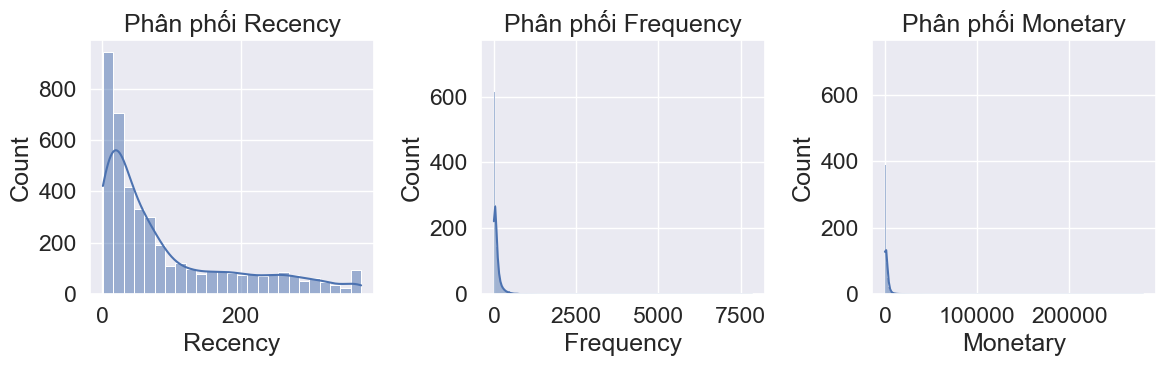

In [80]:
#Thực hiện vẽ phân phối dữ liệu để tiến hành kiểm tra ba trường R, F, M
# Tạo các biểu đồ con
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# Vẽ phân phối cho Recency
sns.histplot(df_customers['Recency'], kde=True, ax=ax[0])
ax[0].set_title('Phân phối Recency')

# Vẽ phân phối cho Frequency
sns.histplot(df_customers['Frequency'], kde=True, ax=ax[1])
ax[1].set_title('Phân phối Frequency')

# Vẽ phân phối cho Monetary
sns.histplot(df_customers['Monetary'], kde=True, ax=ax[2])
ax[2].set_title('Phân phối Monetary')

# Hiển thị các biểu đồ
plt.tight_layout()
plt.show()

# Ta thấy được các phân phối từ Recency, Frequency, Monetary đều có biểu đồ biểu diễn lệch trái:

--> Dấu hiệu này cho thấy, phân phối không phù hợp vì mô hình lệch phải (dựa vào Skewness mô hình để đánh giá: Nằm trong file đính kèm của tệp) vì thế nếu tiến hành các thao tác tạo model,... thì sẽ không thực sự hiệu quả.

# Tiếp theo ta sẽ tiến hành phương pháp Transformation cho mô hình bao gồm:

.Log Transformation

.Square Transformation

.Box-cox Transformation

.Cube Root Transformation

In [81]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(df_customers[x], ax=ax[0,0])
    sns.distplot(np.log(df_customers[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(df_customers[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(df_customers[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    
    print(df_customers[x].skew().round(2))
    print(np.log(df_customers[x]).skew().round(2))
    print(np.sqrt(df_customers[x]).skew().round(2))
    print(pd.Series(stats.boxcox(df_customers[x])[0]).skew().round(2))

C:\Users\datng\AppData\Local\Temp\ipykernel_13140\759705056.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_customers[x], ax=ax[0,0])
C:\Users\datng\AppData\Local\Temp\ipykernel_13140\759705056.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df_customers[x]), ax=ax[0,1])
C:\Use

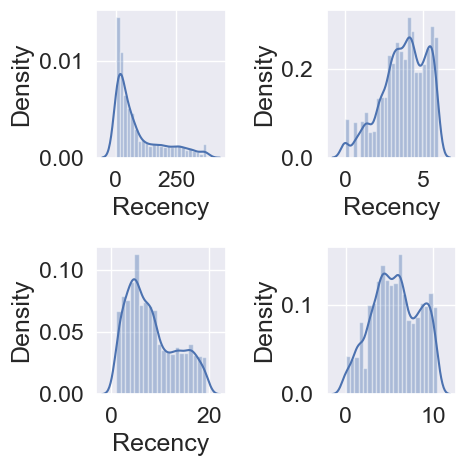

1.25
-0.55
0.59
-0.07


In [82]:
analyze_skewness('Recency')

In [83]:
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_skewness(df_customers, column_name):
    # Tạo các biểu đồ con
    fig, ax = plt.subplots(2, 2, figsize=(12, 10))
    
     # Vẽ phân phối dữ liệu gốc
    sns.histplot(df_customers[column_name], kde=True, ax=ax[0, 0])
    ax[0, 0].set_title('Original Distribution')
    
    # Vẽ phân phối dữ liệu sau khi biến đổi log
    sns.histplot(np.log(df_customers[column_name] + 1), kde=True, ax=ax[0, 1])  # Adding 1 to avoid log(0)
    ax[0, 1].set_title('Log-Transformed Distribution')
    
    # Vẽ phân phối dữ liệu sau khi biến đổi căn bậc hai
    sns.histplot(np.sqrt(df_customers[column_name]), kde=True, ax=ax[1, 0])
    ax[1, 0].set_title('Square Root Transformed Distribution')
    
    # Vẽ phân phối dữ liệu sau khi biến đổi Box-Cox
    # Biến đổi Box-Cox yêu cầu giá trị dương
    positive_values = df_customers[column_name] + 1  # Dịch chuyển dữ liệu để tất cả các giá trị đều dương
    transformed, _ = stats.boxcox(positive_values)
    sns.histplot(transformed, kde=True, ax=ax[1, 1])
    ax[1, 1].set_title('Box-Cox Transformed Distribution')
    
    plt.tight_layout()
    plt.show()
    
    # Print skewness values
    print(f"Original skewness: {df_customers[column_name].skew().round(2)}")
    print(f"Log-transformed skewness: {np.log(df_customers[column_name] + 1).skew().round(2)}")
    print(f"Square root-transformed skewness: {np.sqrt(df_customers[column_name]).skew().round(2)}")
    print(f"Box-Cox transformed skewness: {pd.Series(transformed).skew().round(2)}")

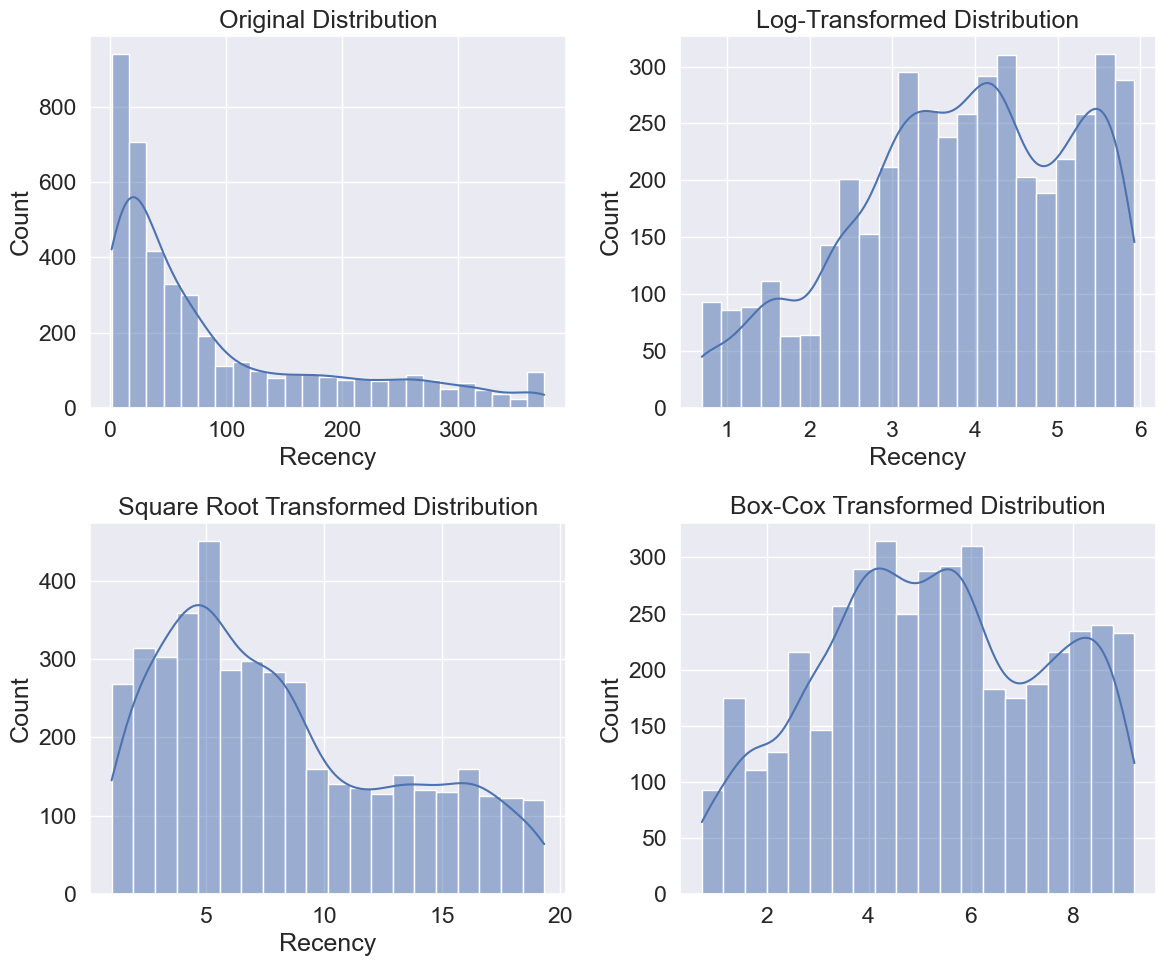

Original skewness: 1.25
Log-transformed skewness: -0.38
Square root-transformed skewness: 0.59
Box-Cox transformed skewness: -0.06


In [85]:
analyze_skewness(df_customers, 'Recency')

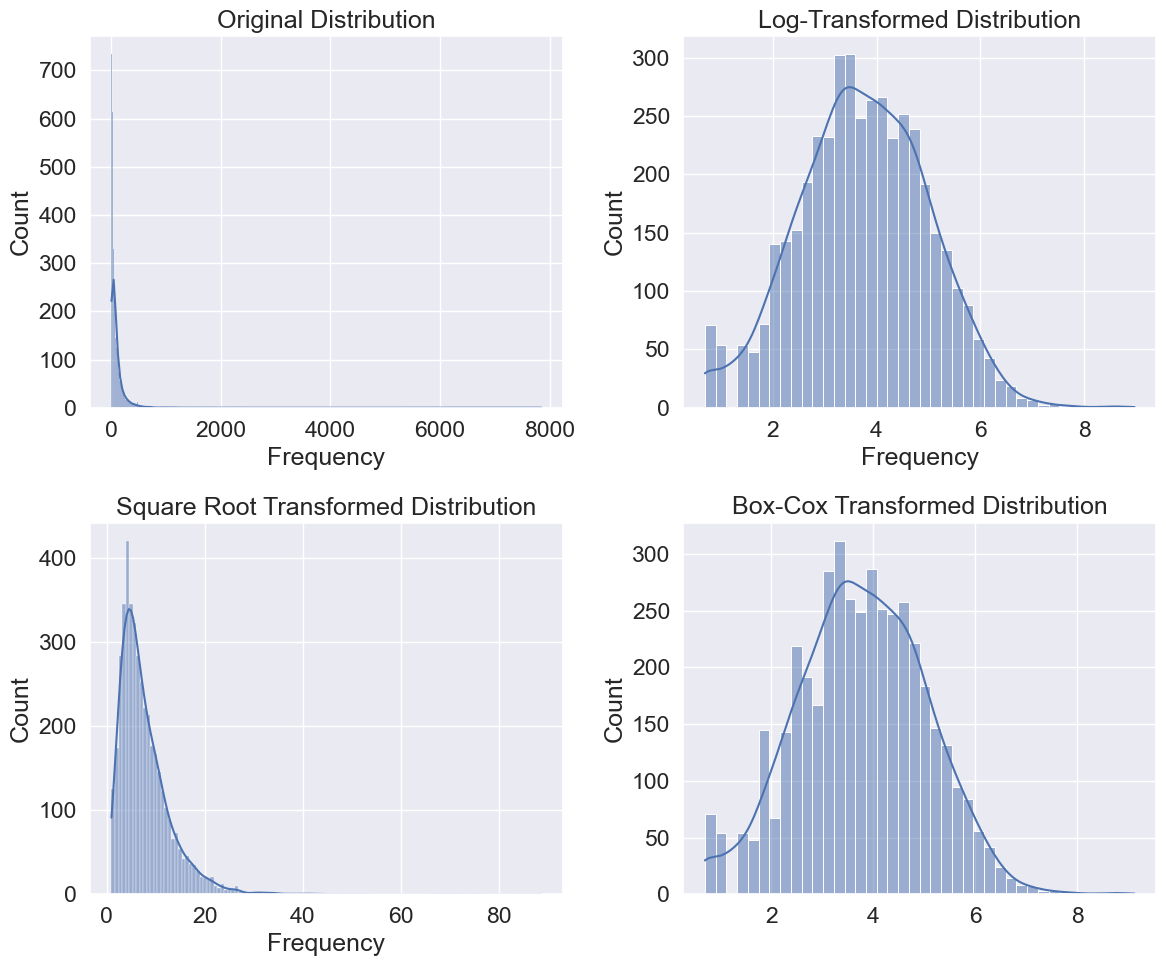

Original skewness: 18.11
Log-transformed skewness: -0.01
Square root-transformed skewness: 3.22
Box-Cox transformed skewness: -0.0


In [86]:
analyze_skewness(df_customers, 'Frequency')

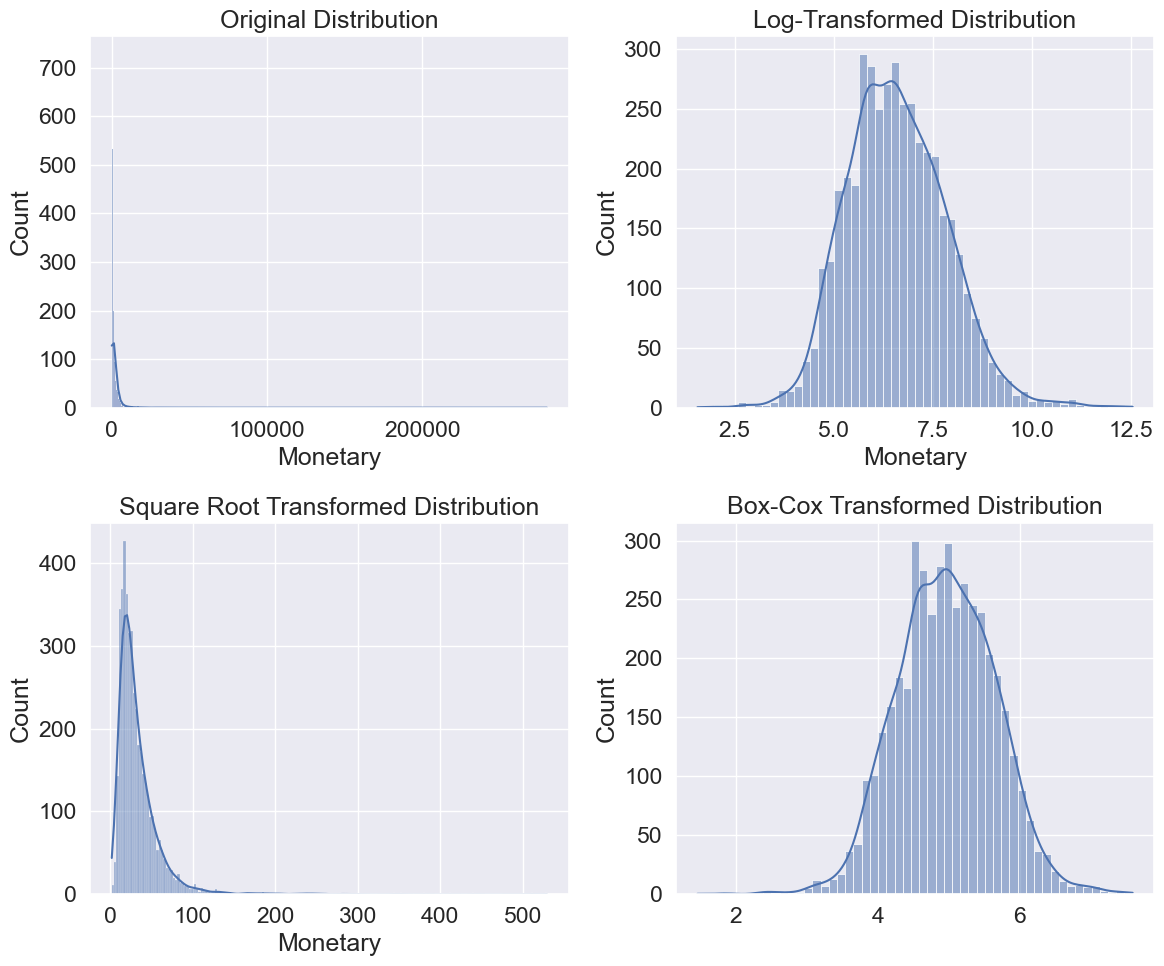

Original skewness: 19.32
Log-transformed skewness: 0.39
Square root-transformed skewness: 5.89
Box-Cox transformed skewness: -0.01


In [87]:
analyze_skewness(df_customers, 'Monetary')

Dựa theo mô hình ta thấy được chỉ số Box-Cox transformed skewness: -0.06 là tiến gần đến 0 

--> Cho nên đối với ta sẽ chọn mô hình Box-Cox để tiến hành Transformation

In [99]:
#Tiến hành Transform dữ liệu
#Lưu trữ dữ liệu để tránh trường hợp dữ liệu trên bị lỗi
df_customers_t = pd.DataFrame()
df_customers_t['Recency'] = stats.boxcox(df_customers['Recency'])[0]
df_customers_t['Frequency'] = stats.boxcox(df_customers['Frequency'])[0]
df_customers_t['Monetary'] = stats.boxcox(df_customers['Monetary'])[0]
df_customers_t.head()

,Recency,Frequency,Monetary
0,10.039089,0.000000,7.280024
1,0.737107,5.967408,6.011123
2,6.460361,3.756089,5.561659
3,3.855960,4.800962,5.549746
4,9.900640,3.050162,4.599025


In [101]:
#Tiến hành Scale dữ liệu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_customers_t)

df_customers_t = scaler.transform(df_customers_t)
df_customers_t

array([[ 1.62487001, -2.57178095,  3.14411433],
       [-1.84163571,  1.16617768,  1.37604893],
       [ 0.29121018, -0.21898305,  0.74977397],
       ...,
       [-1.18095643, -0.91134674, -1.14510853],
       [-1.5313799 ,  2.37588685,  0.86284663],
       [-0.1303989 ,  0.40277588,  0.76612172]])

In [102]:
pd.DataFrame(df_customers_t).head()

,0,1,2
0,1.624870,-2.571781,3.144114
1,-1.841636,1.166178,1.376049
2,0.291210,-0.218983,0.749774
3,-0.679354,0.435521,0.733175
4,1.573275,-0.661173,-0.591544


In [ ]:
#Đưa dữ liệu KMeans:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

sse = {}
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_customers_t)
    sse[k] = kmeans.inertia_
    
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.poinplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

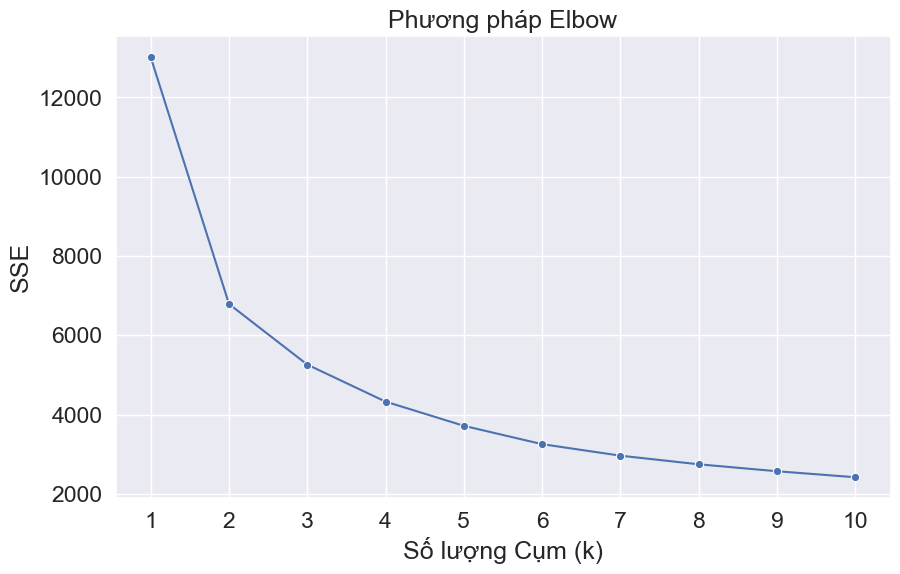

In [119]:
# Khởi tạo một từ điển để lưu trữ các giá trị SSE
sse = {}

# Tính toán phân cụm KMeans cho các giá trị k khác nhau và lưu trữ SSE
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,  n_init=10,random_state=42)
    kmeans.fit(df_customers_t)
    sse[k] = kmeans.inertia_

# Vẽ đồ thị Phương pháp Elbow
plt.figure(figsize=(10, 6))
plt.title('Phương pháp Elbow')
plt.xlabel('Số lượng Cụm (k)')
plt.ylabel('SSE')

# Sử dụng lineplot để minh họa rõ ràng các giá trị SSE
sns.lineplot(x=list(sse.keys()), y=list(sse.values()), marker='o')
plt.xticks(range(1, 11))  # Đặt các điểm đánh dấu trên trục x từ 1 đến 10
plt.grid(True)
plt.show()

In [114]:
from sklearn.cluster import KMeans

# Create and fit the KMeans model with n_init explicitly set
model = KMeans(n_clusters=4, n_init=10, random_state=42)
model.fit(df_customers_t)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [117]:
#Tiến hành dán nhãn cho các CustomerID
df_customers['Cluster'] = model.labels_
df_customers

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346,326,1,77183.60,3
12347,2,182,4310.00,0
12348,75,31,1797.24,3
12349,19,73,1757.55,0
12350,310,17,334.40,2
...,...,...,...,...
18280,278,10,180.60,2
18281,181,7,80.82,2
18282,8,12,178.05,1


In [118]:
df_customers.groupby('Cluster').agg(
    {
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
    }
).round(2)

,Recency,Frequency,Monetary
Cluster,,,
0,13.89,251.74,6108.83
1,31.19,26.73,436.89
2,220.44,15.47,289.15
3,93.57,75.09,1458.91


# Nhìn vào bảng ta nhận thấy được: 

** Tỷ lệ ước tính phần trăm chất lượng KH = (Monetary/Frequency)**

.Tại Cluster 0 - Redency = 13.89 là cụm KH mua hàng rất gần đây, nhưng ta có thể thấy thêm vào đó tổng số lượng Tần suất mua hàng với Frequency là lớn nhất Frequency = 251.74 hóa đơn với mức giá trị Monetary = 6108.83 đơn vị là rất lớn. Mặc dù, đây là lượng KH mới nhưng lại vô cùng tin tưởng hoặc đã được biết thông tin từ trước đó.(đạt 24.2664256773%)
--> Có thể nhận thấy được đây là tệp KH vô cùng tiềm năng, với mức chi phí chi trả cao gấp 5 lần so với giá các cụm khác thì đã cho thấy được việc SP đã và đang thực sự rất tốt(cần giữ và hoàn thiện về lâu về dài SP hơn nữa, để giữ chân KH)

.Tại Cluster 1 - Redency = 31.19 là cụm KH cũng tương tự KH cụm Cluster 0 cũng mua gần đây, nhưng với tần suất Frequency = 26.73 hóa đơn khá nhỏ nhưng cũng đã bỏ ra mức giá trị Monetary = 436.89 là khá là nhiều. 
--> Tệp KH này còn khá là mới, và khá là dè dặt trong việc lựa chọn tin tưởng hoàn toàn so với cụm Cluster 0. Nhưng với chỉ số chiếm 16.344%(Monetary/Frequency) cũng khá là cao với đối với KH mới như này, SP đang đáp ứng tốt với nhu cầu tiêu dùng của KH chấp nhận chi trả cho SP.

.Tại tệp Cluster 2 - Redency = 220.44 cho thấy đây là cụm KH quen thuộc, nhưng lại tỉ lệ nghịch hoàn toàn so với 2 tệp KH trên với tần suất Frequency = 15.47 hóa đơn với mức giá trị Monetary là 289.15 là thấp nhất so với 3 cụm còn lại.(Đạt 18.6910148675%)
--> Một là SP đã quá quen thuộc với tệp KH này, nên họ chi trả khi cần thiết, hoặc hai là SP đã với mẫu mã và chất lượng đã không còn mới lạ so với lúc đầu họ mua(điều này cần điều chỉnh và đổi mới thêm về mặt giao diện SP song song với chất lượng).
Cần đưa ra thêm chiến lược về chiến lược giữ chân KH quen thuộc và quan tâm họ nhiều hơn, giải pháp cho điều này là: Khi SP mới ra,hãy liên hệ và cho họ cảm nhận và sử dụng đầu tiên hoặc áp dụng chương trình ưu đãi mua 1 tặng kèm SP bất kì, tặng vourcher giảm giá SP,...

.Còn đối với tệp KH Cluster 3 - Redency = 93.57 là cụm KH cũng đã biết SP với tần suất Frequency = 75.09 hóa đơn với mức giá trị chi trả đứng thứ 2 Monetary = 1458.91 cao thứ 2 trong 3 cụm. (Đạt 19.4288187508%)
--> Tóm lại, nhìn chung tui nhận thấy rằng SP công ty đang hoạt động và chất lượng đạt vô cùng cao. Nhưng song song đó, cũng cần lập kế hoạch để cải tiến SP và chất lượng & giữ chân tệp KH quen thuộc cho việc về lâu về dài của vòng đời SP.